In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import conda_installer
from rdkit import Chem
from deepchem.feat.graph_features import atom_features as get_atom_features
import rdkit
import pickle
import matplotlib.pyplot as plt
from models.PGCN_model_entropy import get_trained_model, test_model

2025-05-01 08:49:39.375696: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-01 08:49:39.442017: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
No normalization for NumAmideBonds. Feature removed!
No normalization for NumAtomStereoCenters. Feature removed!
No normalization for NumBridgeheadAtoms. Feature removed!
No normalization for NumHeterocycles. Feature removed!
No normaliz

In [2]:
X_folds= pickle.load(open('Datasets/X_folds_NMA_4.pkl', 'rb'))
y_folds = pickle.load(open('Datasets/y_folds_NMA_4.pkl', 'rb'))

In [ ]:
K = 4
epoch = 200
hists = []
test_loss = []
predicts_train = []
predicts_test = []

for k in range(K):
    X_train = []
    for i in range(K):
        if i != k:
            X_train += X_folds[i]
    X_test = X_folds[k]
    y_train = np.concatenate(np.array([y_folds[i] for i in range(K) if i != k]), 0)
    y_test = np.array(y_folds[k])
    #  Passing the X_train and x_add_train to train the model.
    hs, m, x_converted = get_trained_model(X_train, np.array(y_train), epochs=200)
    with open('Datasets/PGCN_nma_ent_K%d_W_n.pkl' % k, 'wb') as f:
        pickle.dump([m.layers[0].w_n, m.layers[0].w_n], f)
        f.close()
    predicts_train.append(m.predict(x_converted, batch_size=len(X_train)))
    hists.append(hs)
    X_test[0].shape
    k_loss, x_converted = test_model(X_test, y_test, m)
    test_loss.append(k_loss)
    predicts_test.append(m.predict(x_converted, batch_size=len(X_test)))
    

Epoch 1/200


2025-05-01 08:49:52.717378: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-05-01 08:49:52.717413: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (curie.cluster): /proc/driver/nvidia/version does not exist
2025-05-01 08:49:52.718483: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
1/1 [==============================] - 44s 44s/step - loss: 1.4746
Epoch 2/200
1/1 [==============================] - 1s 597ms/step - loss: 1.8818
Epoch 3/200
1/1 [==============================] - 1s 654ms/step - loss: 1.4734
Epoch 4/200
1/1 [==============================] - 1s 670ms/step - loss: 1.6897
Epoch 5/200
1/1 [==============================] - 1s 615ms/step - loss: 1.7270
Epoch 6/200
1/1 [==============================] - 1s 603ms/step - loss: 1.5602
Epoch 7/200
1/1 [==============================] - 1s 623ms/step - loss: 1.4709
Epoch 8/200
1/1 [==============================] - 1s 620ms/step - loss: 1.5573
Epoch 9/200
1/1 [==============================] - 1s 636ms/step - loss: 1.6217
Epoch 10/200
1/1 [==============================] - 1s 644ms/step - loss: 1.5744
Epoch 11/20

1/1 [==============================] - 1s 615ms/step - loss: 1.4621
Epoch 197/200
1/1 [==============================] - 1s 625ms/step - loss: 1.4621
Epoch 198/200
1/1 [==============================] - 1s 592ms/step - loss: 1.4620
Epoch 199/200
1/1 [==============================] - 1s 587ms/step - loss: 1.4620
Epoch 200/200
1/1 [==============================] - 5s 5s/step
Epoch 1/200
1/1 [==============================] - 49s 49s/step - loss: 1.3085
Epoch 2/200
1/1 [==============================] - 7s 7s/step - loss: 1.7974
Epoch 3/200
1/1 [==============================] - 6s 6s/step - loss: 1.3541
Epoch 4/200
1/1 [==============================] - 6s 6s/step - loss: 1.4112
Epoch 5/200
1/1 [==============================] - 6s 6s/step - loss: 1.5615
Epoch 6/200
1/1 [==============================] - 6s 6s/step - loss: 1.4570
Epoch 7/200
1/1 [==============================] - 6s 6s/step - loss: 1.3102
Epoch 8/200
1/1 [==============================] - 6s 6s/step - loss: 1.3287
Epoc

1/1 [==============================] - 5s 5s/step
Epoch 1/200
1/1 [==============================] - 51s 51s/step - loss: 1.5193
Epoch 2/200
1/1 [==============================] - 9s 9s/step - loss: 2.0420
Epoch 3/200
1/1 [==============================] - 9s 9s/step - loss: 1.5616
Epoch 4/200
1/1 [==============================] - 9s 9s/step - loss: 1.6564
Epoch 5/200
1/1 [==============================] - 9s 9s/step - loss: 1.8112
Epoch 6/200
1/1 [==============================] - 9s 9s/step - loss: 1.7052
Epoch 7/200
1/1 [==============================] - 9s 9s/step - loss: 1.5455
Epoch 8/200
1/1 [==============================] - 9s 9s/step - loss: 1.5372
Epoch 9/200
1/1 [==============================] - 9s 9s/step - loss: 1.6378
Epoch 10/200
1/1 [==============================] - 9s 9s/step - loss: 1.6708
Epoch 11/200
1/1 [==============================] - 10s 10s/step - loss: 1.6082
Epoch 12/200
1/1 [==============================] - 10s 10s/step - loss: 1.5314
Epoch 13/200
1/1 

1/1 [==============================] - 5s 5s/step
Epoch 1/200
1/1 [==============================] - 56s 56s/step - loss: 1.5375
Epoch 2/200
1/1 [==============================] - 13s 13s/step - loss: 2.0474
Epoch 3/200
1/1 [==============================] - 13s 13s/step - loss: 1.5789
Epoch 4/200
1/1 [==============================] - 13s 13s/step - loss: 1.6677
Epoch 5/200
1/1 [==============================] - 13s 13s/step - loss: 1.8195
Epoch 6/200
1/1 [==============================] - 13s 13s/step - loss: 1.7146
Epoch 7/200
1/1 [==============================] - 14s 14s/step - loss: 1.5596
Epoch 8/200
1/1 [==============================] - 19s 19s/step - loss: 1.5558
Epoch 9/200
1/1 [==============================] - 20s 20s/step - loss: 1.6545
Epoch 10/200
1/1 [==============================] - 20s 20s/step - loss: 1.6828
Epoch 11/200
1/1 [==============================] - 14s 14s/step - loss: 1.6184
Epoch 12/200
1/1 [==============================] - 19s 19s/step - loss: 1.5453

In [15]:
# with open('PGCN_NMA_K%d_fold_hists.pkl' % K, 'wb') as file:
#     pickle.dump(hists, file)
# with open('PGCN_NMA_K%d_fold_test.pkl' % K, 'wb') as file:
#     pickle.dump(test_loss, file)
# with open('PGCN_NMA_K%d_fold_train_pred.pkl' % K, 'wb') as file:
#     pickle.dump(predicts_train, file)
# with open('PGCN_NMA_K%d_fold_test_pred.pkl' % K, 'wb') as file:
#     pickle.dump(predicts_test, file)

In [10]:
%pwd

'/home/lthoma21/BFE-Loss-Function/FINAL-HOSTGUEST-FILES'

In [3]:
import pickle
import numpy as np
K = 4
PGCN_PG_hists = pickle.load(open('Datasets/PGCN_NMA_K4_fold_hists.pkl', 'rb'))
PGCN_PG_loss = np.array(pickle.load(open('Datasets/PGCN_NMA_K4_fold_test.pkl', 'rb')))
PGCN_PG_pred = pickle.load(open('Datasets/PGCN_NMA_K4_fold_test_pred.pkl', 'rb'))

In [4]:
PGCN_PG_pred

[array([[-13.979707  ],
        [-14.744409  ],
        [-14.220986  ],
        [-11.934335  ],
        [-12.167626  ],
        [-12.667443  ],
        [ -1.5412375 ],
        [-12.308793  ],
        [-12.683221  ],
        [  1.2401346 ],
        [-12.998223  ],
        [-11.310967  ],
        [  0.32634676],
        [-12.470513  ],
        [-13.83365   ],
        [ -1.9977957 ]], dtype=float32),
 array([[ -8.6275425],
        [-13.786097 ],
        [-14.226725 ],
        [-14.918589 ],
        [-13.2755375],
        [-11.994989 ],
        [-20.752008 ],
        [-13.44076  ],
        [ -1.3955331],
        [-13.584993 ],
        [-13.488153 ],
        [-16.203852 ],
        [-12.827448 ],
        [-12.779665 ],
        [-13.896967 ],
        [-20.052332 ]], dtype=float32),
 array([[-17.034477 ],
        [-13.413246 ],
        [-13.662857 ],
        [-14.1874695],
        [ -9.6032715],
        [-14.368668 ],
        [-13.394272 ],
        [-14.69696  ],
        [-13.024895 ],
       

In [3]:
Test_loss = PGCN_PG_loss

In [4]:
Test_loss

array([1.45313489, 1.94387126, 1.27326977, 1.21083617])

In [5]:
train_loss = [PGCN_PG_hists[0][-1],PGCN_PG_hists[1][-1],PGCN_PG_hists[2][-1],PGCN_PG_hists[3][-1]]

In [6]:
train_loss

[1.4619170427322388, 1.268070101737976, 1.5052872896194458, 1.5179249048233032]

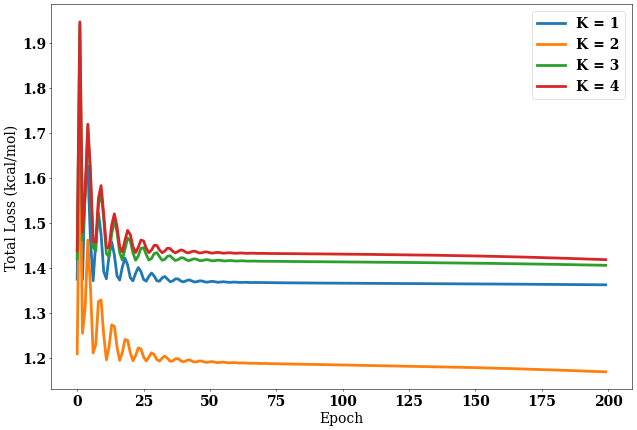

In [35]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)
figure(figsize=(15, 10), dpi=50)
for i in range(K):
    plt.plot(np.array(PGCN_PG_hists[i][0:200]) - .1, label='K = %d' % (i + 1), linewidth=4)
plt.xlabel('Epoch')
plt.ylabel('Total Loss (kcal/mol)')
plt.legend()
plt.savefig('Graphs/PGCN_NMA_without_multiloss_K_fold.png',dpi=50, bbox_inches='tight')